# China vs Thailand Economic Comparison
## Analysis of GDP, Population, and Inflation Data (1990-2024)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the data
df = pd.read_csv('../data/API_Data/P_Data_Extract_From_World_Development_Indicators/filtered_reformatted.csv')

# Convert Year and Value to numeric
df['Year'] = pd.to_numeric(df['Year'])
df['Value'] = pd.to_numeric(df['Value'])

# Display first few rows
print(df.head())
print(f"\nShape: {df.shape}")
print(f"\nUnique Series: {df['Series Name'].unique()}")

  Country Name Country Code        Series Name  Series Code  Year  \
0        China          CHN  Population, total  SP.POP.TOTL  1990   
1        China          CHN  Population, total  SP.POP.TOTL  1991   
2        China          CHN  Population, total  SP.POP.TOTL  1992   
3        China          CHN  Population, total  SP.POP.TOTL  1993   
4        China          CHN  Population, total  SP.POP.TOTL  1994   

          Value  
0  1.135185e+09  
1  1.150780e+09  
2  1.164970e+09  
3  1.178440e+09  
4  1.191835e+09  

Shape: (210, 6)

Unique Series: ['Population, total' 'GDP (current US$)' 'GDP growth (annual %)']


## 1. GDP Comparison Over Time

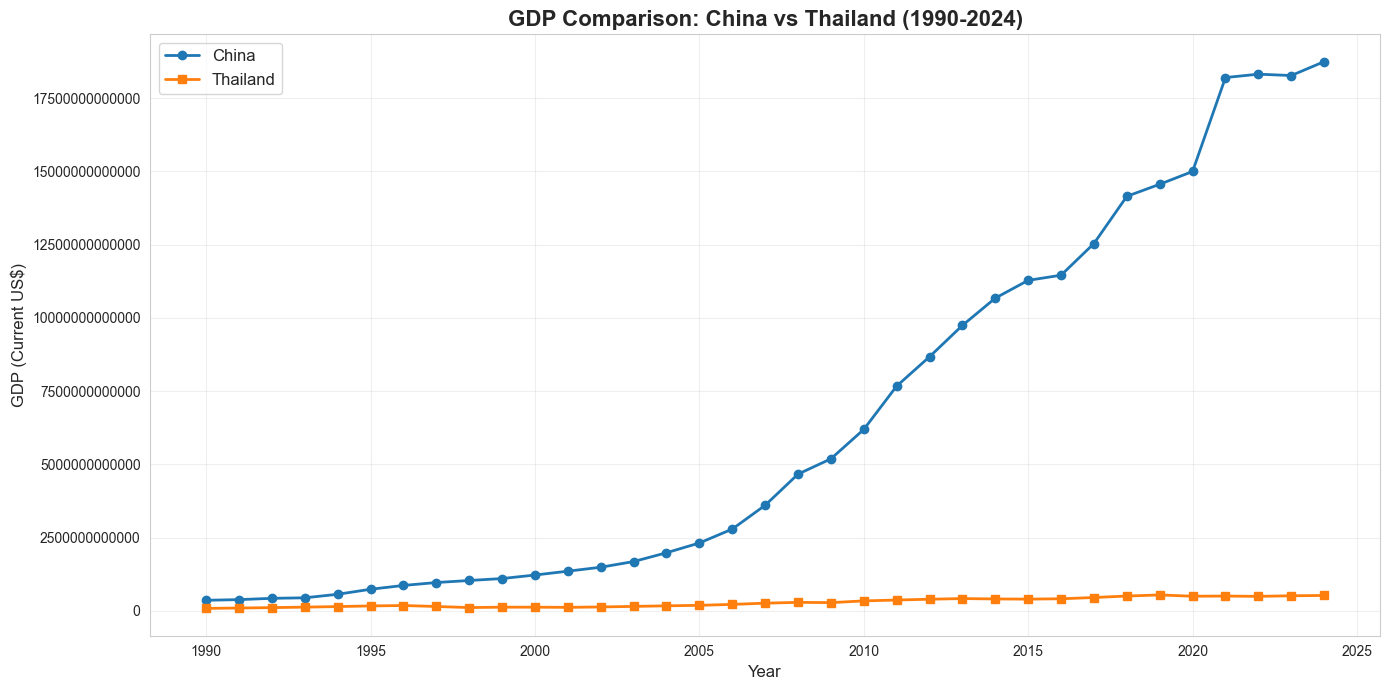

In [3]:
# Filter GDP data
gdp_data = df[df['Series Code'] == 'NY.GDP.MKTP.CD']

# Create pivot table
gdp_pivot = gdp_data.pivot(index='Year', columns='Country Name', values='Value')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(gdp_pivot.index, gdp_pivot['China'], marker='o', label='China', linewidth=2)
plt.plot(gdp_pivot.index, gdp_pivot['Thailand'], marker='s', label='Thailand', linewidth=2)
plt.title('GDP Comparison: China vs Thailand (1990-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (Current US$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## 2. GDP Per Capita Comparison

In [4]:
# Filter GDP per capita data
gdp_pc_data = df[df['Series Code'] == 'NY.GDP.PCAP.CD']

# Create pivot table
gdp_pc_pivot = gdp_pc_data.pivot(index='Year', columns='Country Name', values='Value')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(gdp_pc_pivot.index, gdp_pc_pivot['China'], marker='o', label='China', linewidth=2)
plt.plot(gdp_pc_pivot.index, gdp_pc_pivot['Thailand'], marker='s', label='Thailand', linewidth=2)
plt.title('GDP Per Capita Comparison: China vs Thailand (1990-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (Current US$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

KeyError: 'China'

<Figure size 1400x700 with 0 Axes>

## 3. GDP Growth Rate Comparison

In [ ]:
# Filter GDP growth data
gdp_growth_data = df[df['Series Code'] == 'NY.GDP.MKTP.KD.ZG']

# Create pivot table
gdp_growth_pivot = gdp_growth_data.pivot(index='Year', columns='Country Name', values='Value')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(gdp_growth_pivot.index, gdp_growth_pivot['China'], marker='o', label='China', linewidth=2)
plt.plot(gdp_growth_pivot.index, gdp_growth_pivot['Thailand'], marker='s', label='Thailand', linewidth=2)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('GDP Growth Rate Comparison: China vs Thailand (1990-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Growth (Annual %)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Population Trends

In [ ]:
# Filter population data
pop_data = df[df['Series Code'] == 'SP.POP.TOTL']

# Create pivot table
pop_pivot = pop_data.pivot(index='Year', columns='Country Name', values='Value')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(pop_pivot.index, pop_pivot['China'], marker='o', label='China', linewidth=2)
plt.plot(pop_pivot.index, pop_pivot['Thailand'], marker='s', label='Thailand', linewidth=2)
plt.title('Population Trends: China vs Thailand (1990-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Total)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## 5. Inflation Comparison

In [ ]:
# Filter inflation data
inflation_data = df[df['Series Code'] == 'FP.CPI.TOTL.ZG']

if not inflation_data.empty:
    # Create pivot table
    inflation_pivot = inflation_data.pivot(index='Year', columns='Country Name', values='Value')
    
    # Plot
    plt.figure(figsize=(14, 7))
    plt.plot(inflation_pivot.index, inflation_pivot['China'], marker='o', label='China', linewidth=2)
    plt.plot(inflation_pivot.index, inflation_pivot['Thailand'], marker='s', label='Thailand', linewidth=2)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.title('Inflation Rate Comparison: China vs Thailand (1990-2024)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Inflation, Consumer Prices (Annual %)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No inflation data available in the dataset.")

## 6. GDP Growth vs Inflation Scatter Plot

In [ ]:
# Prepare data for scatter plot
growth_inflation = df[df['Series Code'].isin(['NY.GDP.MKTP.KD.ZG', 'FP.CPI.TOTL.ZG'])]

if not growth_inflation.empty:
    # Pivot to get growth and inflation in separate columns
    scatter_data = growth_inflation.pivot_table(
        index=['Country Name', 'Year'], 
        columns='Series Code', 
        values='Value'
    ).reset_index()
    
    # Drop rows with missing values
    scatter_data = scatter_data.dropna()
    
    if not scatter_data.empty:
        # Plot
        plt.figure(figsize=(12, 8))
        
        for country in ['China', 'Thailand']:
            country_data = scatter_data[scatter_data['Country Name'] == country]
            plt.scatter(
                country_data['NY.GDP.MKTP.KD.ZG'], 
                country_data['FP.CPI.TOTL.ZG'],
                label=country, 
                s=100, 
                alpha=0.6
            )
        
        plt.title('GDP Growth vs Inflation: China vs Thailand', fontsize=16, fontweight='bold')
        plt.xlabel('GDP Growth (Annual %)', fontsize=12)
        plt.ylabel('Inflation (Annual %)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print("No matching data for scatter plot.")
else:
    print("Insufficient data for scatter plot.")

## 7. Dual-Axis Chart: GDP Growth and Inflation Over Time

In [ ]:
# Create dual-axis plots for each country
for country in ['China', 'Thailand']:
    country_data = df[df['Country Name'] == country]
    
    growth = country_data[country_data['Series Code'] == 'NY.GDP.MKTP.KD.ZG'].set_index('Year')['Value']
    inflation = country_data[country_data['Series Code'] == 'FP.CPI.TOTL.ZG'].set_index('Year')['Value']
    
    if not growth.empty:
        fig, ax1 = plt.subplots(figsize=(14, 7))
        
        color1 = 'tab:blue'
        ax1.set_xlabel('Year', fontsize=12)
        ax1.set_ylabel('GDP Growth (%)', color=color1, fontsize=12)
        ax1.plot(growth.index, growth.values, color=color1, marker='o', linewidth=2, label='GDP Growth')
        ax1.tick_params(axis='y', labelcolor=color1)
        ax1.grid(True, alpha=0.3)
        
        if not inflation.empty:
            ax2 = ax1.twinx()
            color2 = 'tab:red'
            ax2.set_ylabel('Inflation (%)', color=color2, fontsize=12)
            ax2.plot(inflation.index, inflation.values, color=color2, marker='s', linewidth=2, label='Inflation')
            ax2.tick_params(axis='y', labelcolor=color2)
        
        plt.title(f'{country}: GDP Growth and Inflation Over Time', fontsize=16, fontweight='bold')
        fig.tight_layout()
        plt.show()